## 데이터 분석을 위한 파이썬 프로그래밍 CAMP - 8주차

### Kaggle Competition Practice
- 타이타닉 생존자 예측 문제 : 생존자와 사망자로 분류하는 모델을 학습한 뒤, answer(test) 데이터의 생존과 사망을 예측하기
- 다음의 주어진 템플릿을 기반으로, 적절한 탐색적 데이터 분석 과정을 거쳐 더 나은 분류 모델 만들기
- Accuracy, F1-score, ROC curve 등을 평가 기준으로 활용.
- 최종 평가는 반드시 titanic_answer.csv 데이터로만 해야 함.

### 힌트 및 고려 요소
- 돈과 지위, 나이와 성별을 잘 활용할 것.
- 변수를 그대로 사용하지 말고, 한 번 변형하여 의미를 준 다음에 사용하면 더욱 좋은 결과를 낼 수도 있음.
- 무조건 사망한다고 때려맞혀도 정확도는 60%가 넘음.

------

#### Data Import

In [1]:
# -*- coding: utf-8 -*-
"""
Created on 2018

@author: yoon, fastcampus
"""

import pandas as pd

titanic = pd.read_csv("dataset/titanic_dataset.csv")
answer = pd.read_csv("dataset/titanic_answer.csv")

In [2]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
5,3,0,"Linehan, Mr. Michael",male,NaN,0,0,330971,7.8792,NaN,Q,NaN,NaN
6,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,NaN,NaN
7,2,1,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S,NaN,"Plymouth, Devon / Detroit, MI"
8,1,0,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C,NaN,"Haverford, PA"
9,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S,NaN,"St Louis, MO"


#### Missing data check

In [3]:
print(titanic.isnull().sum())
print("------------------")
print(answer.isnull().sum())

pclass         0
survived       0
name           0
sex            0
age          175
sibsp          0
parch          0
ticket         0
fare           0
cabin        702
embarked       2
body         831
home.dest    389
dtype: int64
------------------
pclass         0
survived       0
name           0
sex            0
age           88
sibsp          0
parch          0
ticket         0
fare           0
cabin        312
embarked       0
body         357
home.dest    175
dtype: int64


#### Select features for classification

In [4]:
# cabin, age, body, home.dest : 결측데이터 처리
titanic = titanic.drop(['cabin', 'body', 'home.dest'], axis=1)
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

# name, ticket : 불필요한 feature 제거
titanic = titanic.drop(['name', 'ticket'], axis=1)

# sex : male은 0, female은 1로 변환
titanic.loc[titanic['sex']=='male', 'sex'] = 0
titanic.loc[titanic['sex']=='female', 'sex'] = 1

# embark : 2개의 결측값은 최빈값으로 대체하고, one hot encoding 적용
embarked_mode = titanic['embarked'].value_counts().index[0]
titanic['embarked'] = titanic['embarked'].fillna(embarked_mode)

df_one_hot_encoded = pd.get_dummies(titanic.embarked)
titanic = pd.concat([titanic, df_one_hot_encoded], axis=1)
titanic = titanic.drop(['embarked'], axis=1)

# train data, test data 분리
from sklearn.model_selection import train_test_split
train, test = train_test_split(titanic, test_size=0.3, random_state=0)

train_y = train['survived']
train_x = train.drop(['survived'], axis=1)

test_y = test['survived']
test_x = test.drop(['survived'], axis=1)

In [5]:
train_x.head()

,pclass,sex,age,sibsp,parch,fare,C,Q,S
76,3,0,40.0,1,5,31.3875,0,0,1
48,1,0,46.0,0,0,75.2417,1,0,0
440,3,0,22.0,0,0,7.5208,0,0,1
263,1,1,39.0,1,1,83.1583,1,0,0
742,1,1,30.0,0,0,86.5000,0,0,1


#### Learning classification model

In [6]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

print("Misclassification samples : %d" %(test_y!=pred_y).sum())

Misclassification samples : 69


#### Evaluation

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
print("accuracy: %.2f" %accuracy_score(test_y, pred_y))
print("Precision : %.3f" % precision_score(test_y, pred_y))
print("Recall : %.3f" % recall_score(test_y, pred_y))
print("F1 : %.3f" % f1_score(test_y, pred_y))

accuracy: 0.75
Precision : 0.688
Recall : 0.694
F1 : 0.691


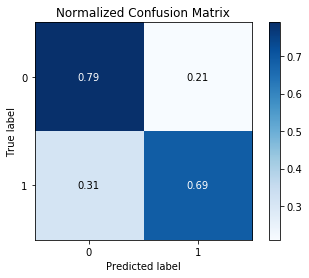

In [8]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(test_y, pred_y, normalize=True)
plt.show()

#### Cross validation

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, train_x, train_y, cv=10)
print(scores)

[ 0.73846154  0.8         0.734375    0.71875     0.78125     0.859375
  0.703125    0.8125      0.71875     0.74603175]


#### Real Data Test

In [10]:
answer = answer.drop(['cabin', 'body', 'home.dest'], axis=1)
answer['age'] = answer['age'].fillna(titanic['age'].mean())
answer = answer.drop(['name', 'ticket'], axis=1)

answer.loc[answer['sex']=='male', 'sex'] = 0
answer.loc[answer['sex']=='female', 'sex'] = 1

embarked_mode = answer['embarked'].value_counts().index[0]
answer['embarked'] = answer['embarked'].fillna(embarked_mode)

df_one_hot_encoded = pd.get_dummies(answer.embarked)
answer = pd.concat([answer, df_one_hot_encoded], axis=1)
answer = answer.drop(['embarked'], axis=1)

answer_y = answer['survived']
answer_x = answer.drop(['survived'], axis=1)
pred_y = clf.predict(answer_x)

print("accuracy: %.2f" %accuracy_score(answer_y, pred_y))
print("Precision : %.3f" % precision_score(answer_y, pred_y))
print("Recall : %.3f" % recall_score(answer_y, pred_y))
print("F1 : %.3f" % f1_score(answer_y, pred_y))

accuracy: 0.75
Precision : 0.687
Recall : 0.612
F1 : 0.647


# Now let's score!

-----

#### 참고 : 성능이 좋은 알고리즘들
- 랜덤 포레스트
- SVC
- Logistic regression

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1000.0, random_state=0)
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

-----